In [536]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [537]:
df = pd.read_csv("Uber_and_Lyft.csv")

In [538]:
print(df.columns)

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [539]:
unnecessary_cols = [
    'id', 'timestamp','timezone','product_id',
    'apparentTemperature','short_summary','long_summary',
    'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'
]

<ipython-input-540-8e2c7b3d5a34>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

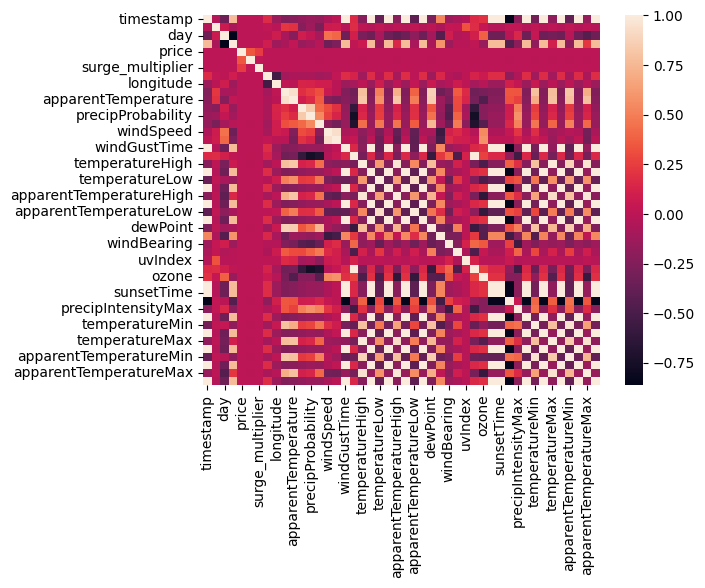

In [540]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

In [541]:
df.drop(columns=unnecessary_cols, inplace=True)
#df

In [542]:
print(df.isnull().sum())

hour                    0
day                     0
month                   0
datetime                0
source                  0
destination             0
cab_type                0
name                    0
price               55095
distance                0
surge_multiplier        0
latitude                0
longitude               0
temperature             0
icon                    0
dtype: int64


In [543]:
df.dropna(inplace=True)

In [544]:
df.set_index((x for x in range(df.shape[0])),inplace=True)
df

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,icon
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,partly-cloudy-night
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,rain
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,clear-night
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,clear-night
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,WAV,9.5,1.00,1.0,42.3519,-71.0643,37.05,partly-cloudy-night
637972,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,partly-cloudy-night
637973,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,UberX,9.5,1.00,1.0,42.3519,-71.0643,37.05,partly-cloudy-night
637974,23,1,12,2018-12-01 23:53:05,West End,North End,Uber,Black SUV,27.0,1.00,1.0,42.3519,-71.0643,37.05,partly-cloudy-night


In [545]:
print('The earliest date is {} and the last date is {}'.format(df['datetime'].min(), df['datetime'].max()))
print('The Max Fare is {} and the Min Fare is {}'.format(df['price'].max(), df['price'].min()))
print('The Highest Temperature is {} and the Lowest Temperature is {}'.format(df['temperature'].max(), df['temperature'].min()))

The earliest date is 2018-11-26 03:40:46 and the last date is 2018-12-18 19:15:10
The Max Fare is 97.5 and the Min Fare is 2.5
The Highest Temperature is 57.22 and the Lowest Temperature is 18.91


In [546]:
def convert_date_to_day(hr):
    day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    if int(hr[5:7]) == 11:
      diff = int(hr[8:10]) - 26
      dy = diff % 7
      return day[dy]
    if int(hr[5:7]) == 12:
      if hr[8:10] == "01":
        return day[5]
      elif hr[8:10] == "02":
        return day[6]
      else:
        diff = int(hr[8:10]) - 3
        dy = diff % 7
        return day[dy]

df['Weekday'] = df['datetime'].apply(convert_date_to_day)

In [547]:
df['datetime'] = pd.to_datetime(df['datetime'], format = '%Y%m%d %H:%M')

<Axes: xlabel='cab_type', ylabel='count'>

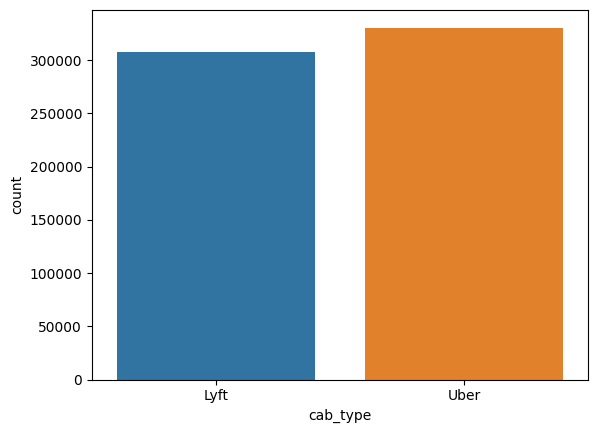

In [548]:
sns.countplot(x='cab_type',data=df)

# Removing Outliers

5589


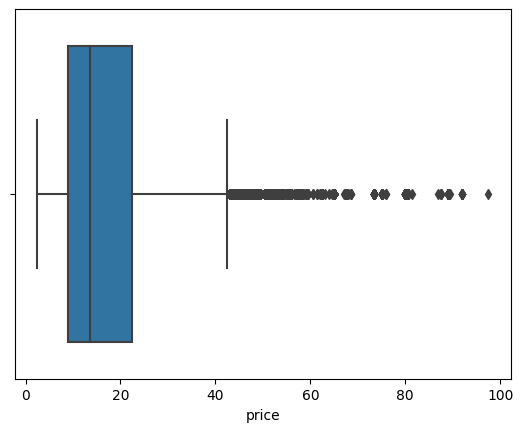

In [549]:
from matplotlib.cbook import boxplot_stats

outliers = boxplot_stats(df.price)[0]['fliers']
sns.boxplot(data =df,x='price')
print(len(outliers))
#print(outliers)

In [550]:
# Calculate the IQR and the outlier thresholds
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Remove outliers by filtering the DataFrame
df= df[(df['price'] >= lower_threshold) & (df['price'] <= upper_threshold)]

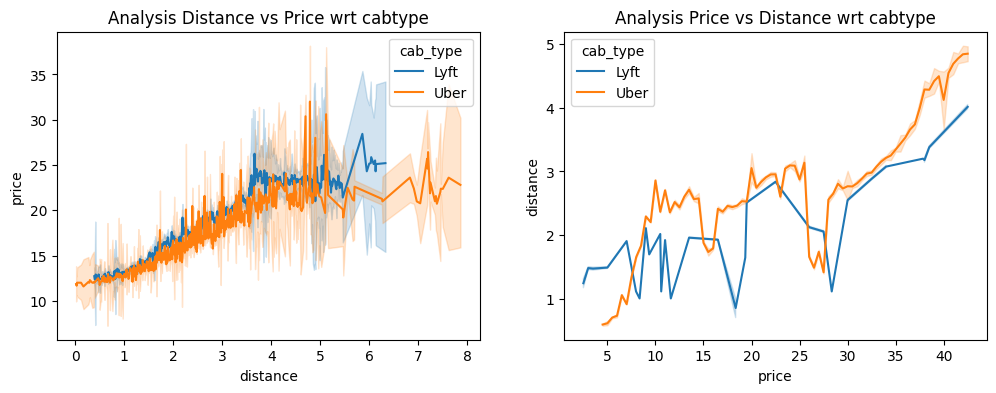

In [551]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.lineplot(data=df,x='distance',y='price',hue='cab_type')
plt.title("Analysis Distance vs Price wrt cabtype")

plt.subplot(1,2,2)
sns.lineplot(data=df,x='price',y='distance',hue='cab_type')
plt.title("Analysis Price vs Distance wrt cabtype")

plt.show()
#plt.title

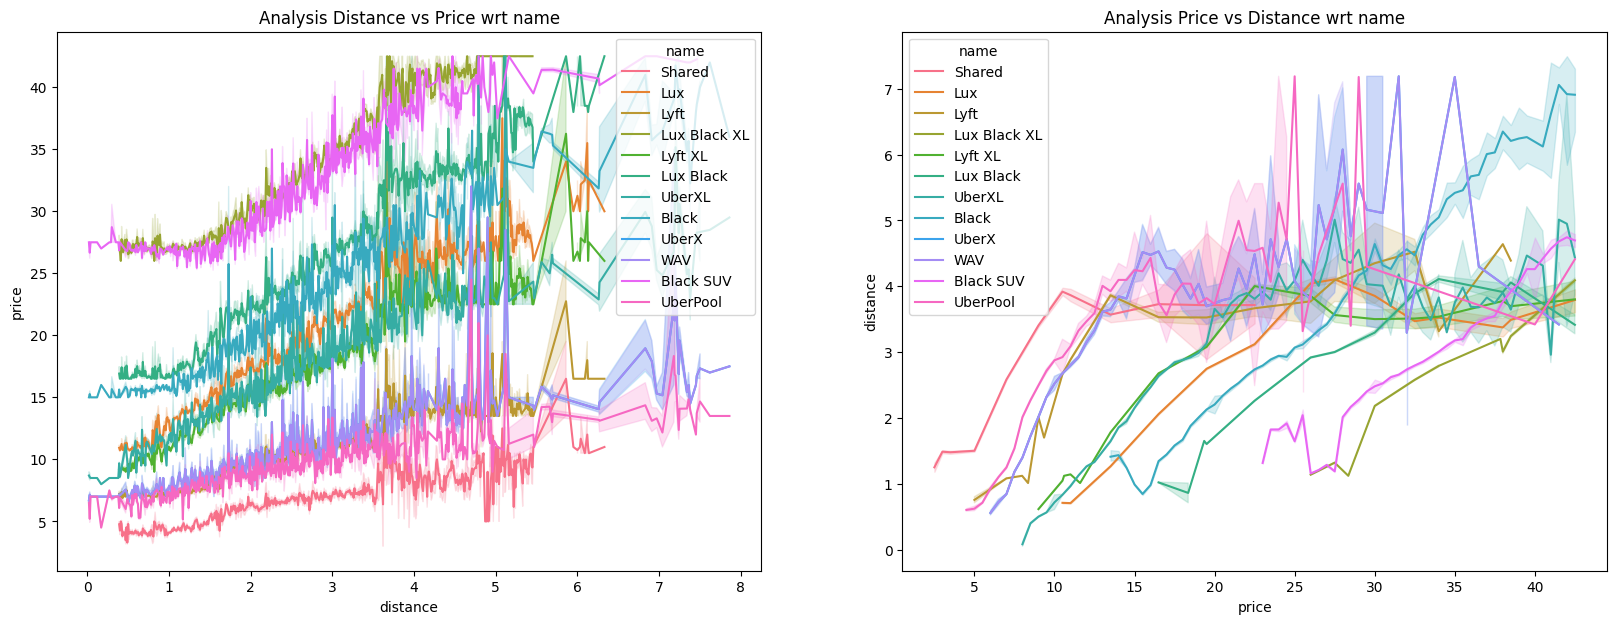

In [552]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.lineplot(data=df,x='distance',y='price',hue='name')
plt.title("Analysis Distance vs Price wrt name")

plt.subplot(1,2,2)
sns.lineplot(data=df,x='price',y='distance',hue='name')
plt.title("Analysis Price vs Distance wrt name")

plt.show()

Text(0.5, 1.0, 'Analysis Distance vs Price wrt icon')

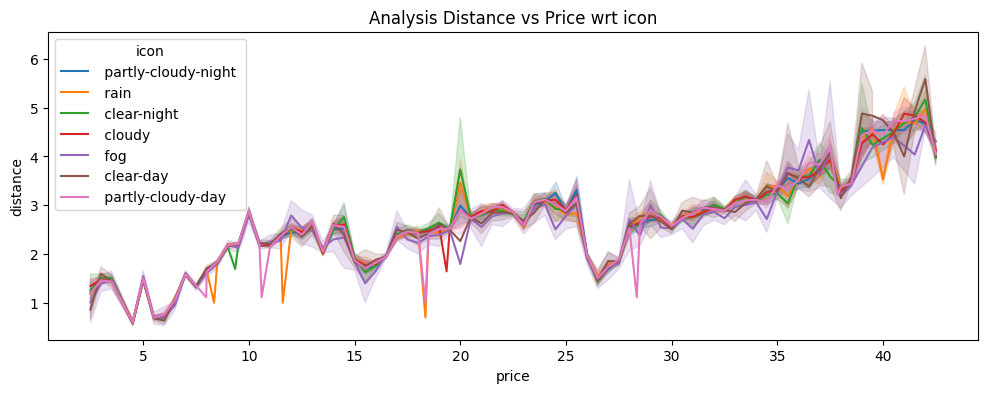

In [553]:
plt.figure(figsize=(12,4))
#plt.subplot(1,2,1)
sns.lineplot(data=df,x='price',y='distance',hue='icon')
plt.title("Analysis Distance vs Price wrt icon")

<Figure size 2000x300 with 0 Axes>

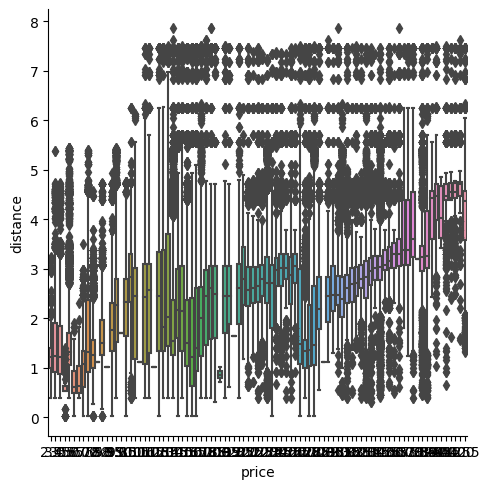

In [554]:
# plt.figure(figsize=(12,4))
# #plt.subplot(1,2,1)
# sns.lineplot(data=df,x='price',y='distance',hue='temperature')
# plt.title("Analysis Distance vs Price wrt icon")

plt.figure(figsize=(20,3))
sns.catplot(data=df, x="price", y="distance", kind="box")


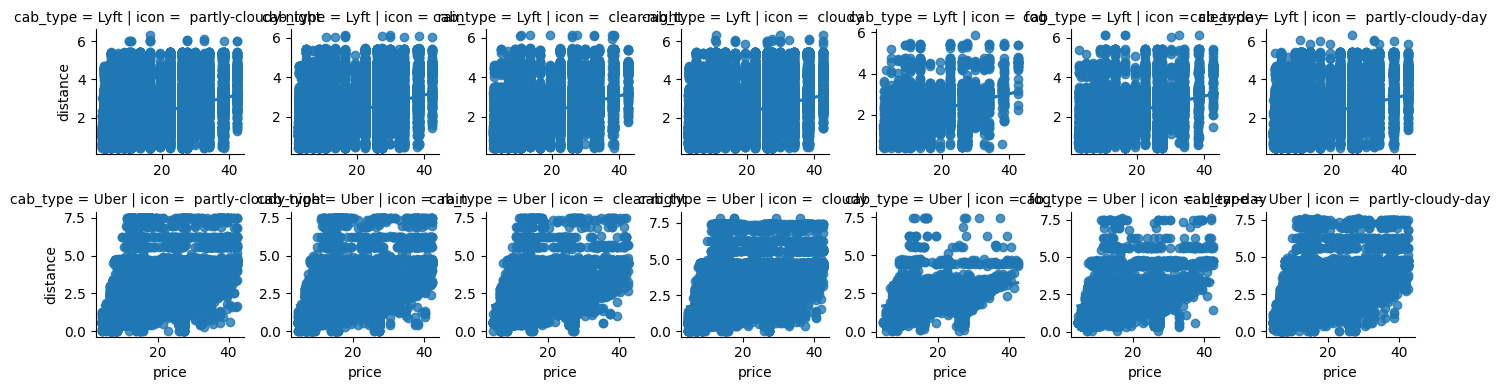

In [555]:
sns.lmplot(
    data=df, x="price", y="distance",
    col="icon", row="cab_type", height=2,
    facet_kws=dict(sharex=False, sharey=False),
)

<Axes: xlabel='hour', ylabel='count'>

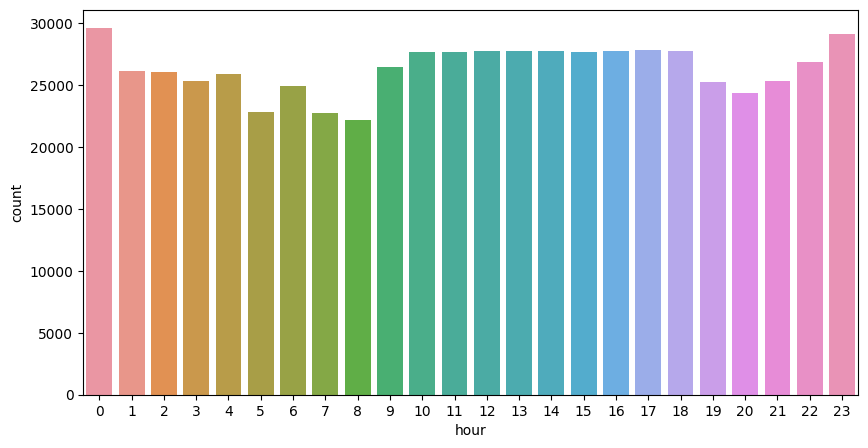

In [556]:
plt.figure(figsize=(10,5))
sns.countplot(x='hour',data=df)

Text(0.5, 1.0, 'Num of Trips vs Hours')

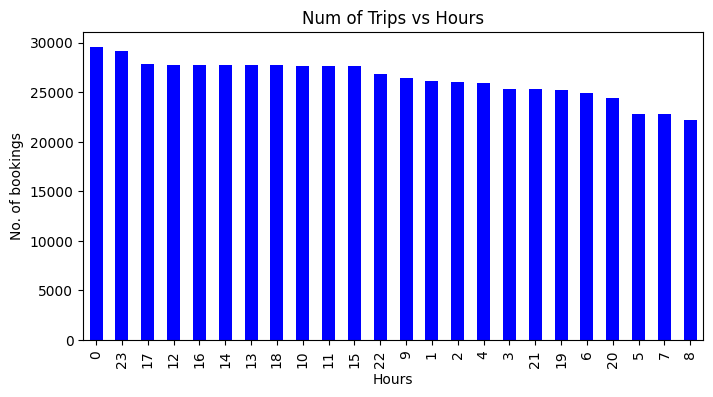

In [557]:
hours = df['hour'].value_counts()
hours.plot(kind='bar',color='blue',figsize=(8,4))
plt.xlabel("Hours")
plt.ylabel("No. of bookings")
plt.title("Num of Trips vs Hours")

Text(0.5, 1.0, 'Day vs Frequency')

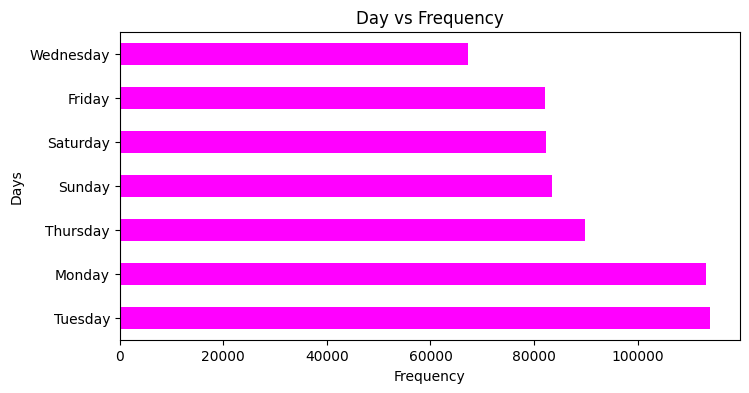

In [558]:
days = df["Weekday"].value_counts()
days.plot(kind='barh',color='magenta',figsize=(8,4))
plt.xlabel("Frequency")
plt.ylabel("Days")
plt.title("Day vs Frequency")

Text(0.5, 1.0, 'Pickup Location vs Frequency')

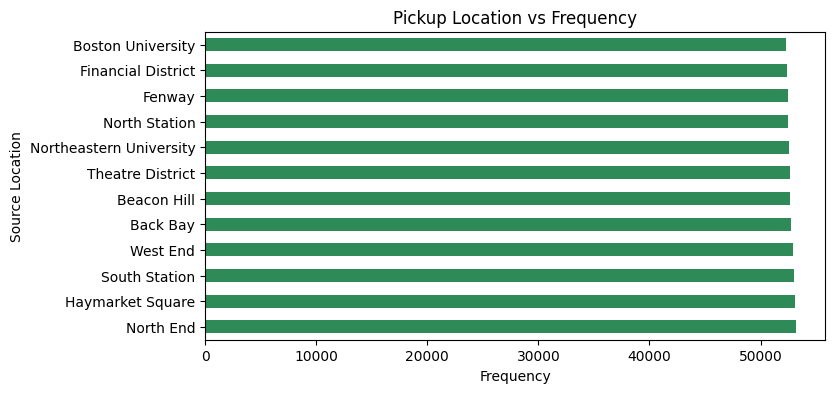

In [559]:
source = df["source"].value_counts()
source.plot(kind='barh',color='seagreen',figsize=(8,4))
plt.xlabel("Frequency")
plt.ylabel("Source Location")
plt.title("Pickup Location vs Frequency")

<Axes: xlabel='count', ylabel='source'>

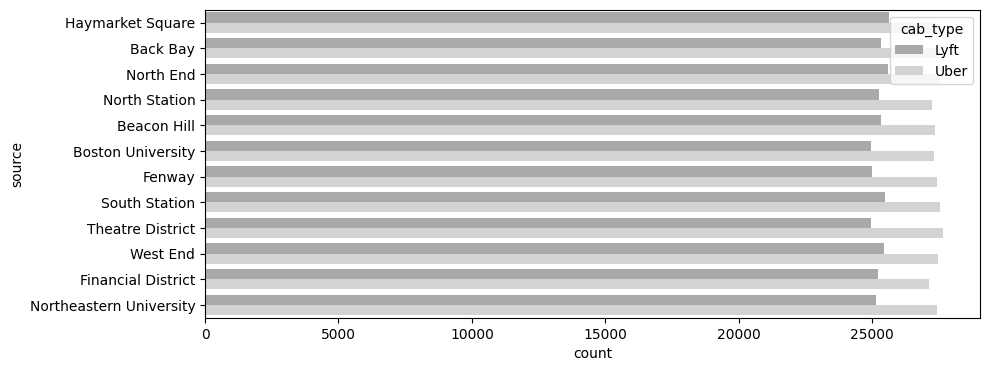

In [560]:
plt.figure(figsize=(10,4))
color = {'Uber': 'lightgrey', 'Lyft': 'darkgrey'}
sns.countplot(data=df,y="source", hue="cab_type",palette=color)

Text(0.5, 1.0, 'Drop Location vs Frequency')

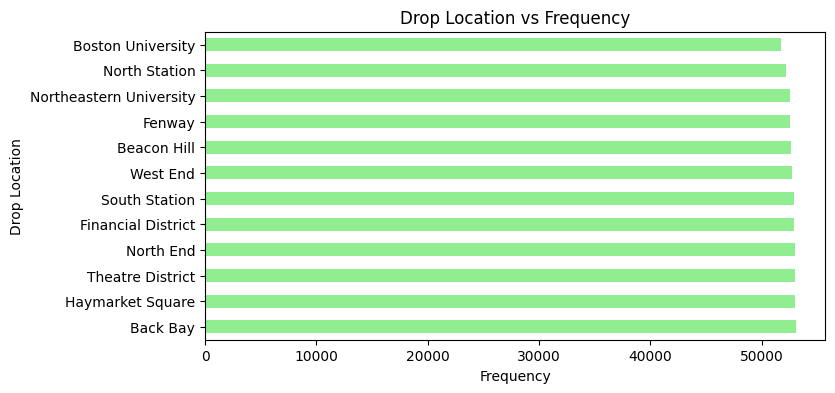

In [561]:
dropoff = df["destination"].value_counts()
dropoff.plot(kind='barh',color='lightgreen',figsize=(8,4))
plt.xlabel("Frequency")
plt.ylabel("Drop Location")
plt.title("Drop Location vs Frequency")

<Axes: xlabel='count', ylabel='destination'>

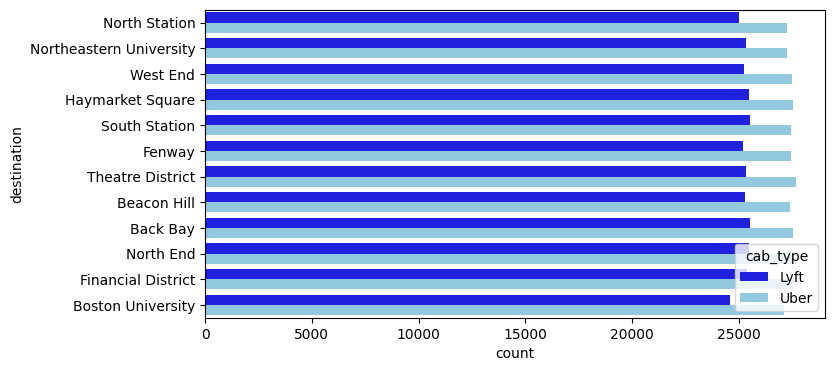

In [562]:
plt.figure(figsize=(8,4))
color = {'Uber': 'skyblue', 'Lyft': 'blue'}
sns.countplot(data=df,y="destination", hue="cab_type",palette=color)

In [563]:
df['Trips'] = df['source'] + '-' + df['destination']

<ipython-input-563-b27b19284774>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Trips'] = df['source'] + '-' + df['destination']


Text(0.5, 1.0, 'Trips vs Frequency')

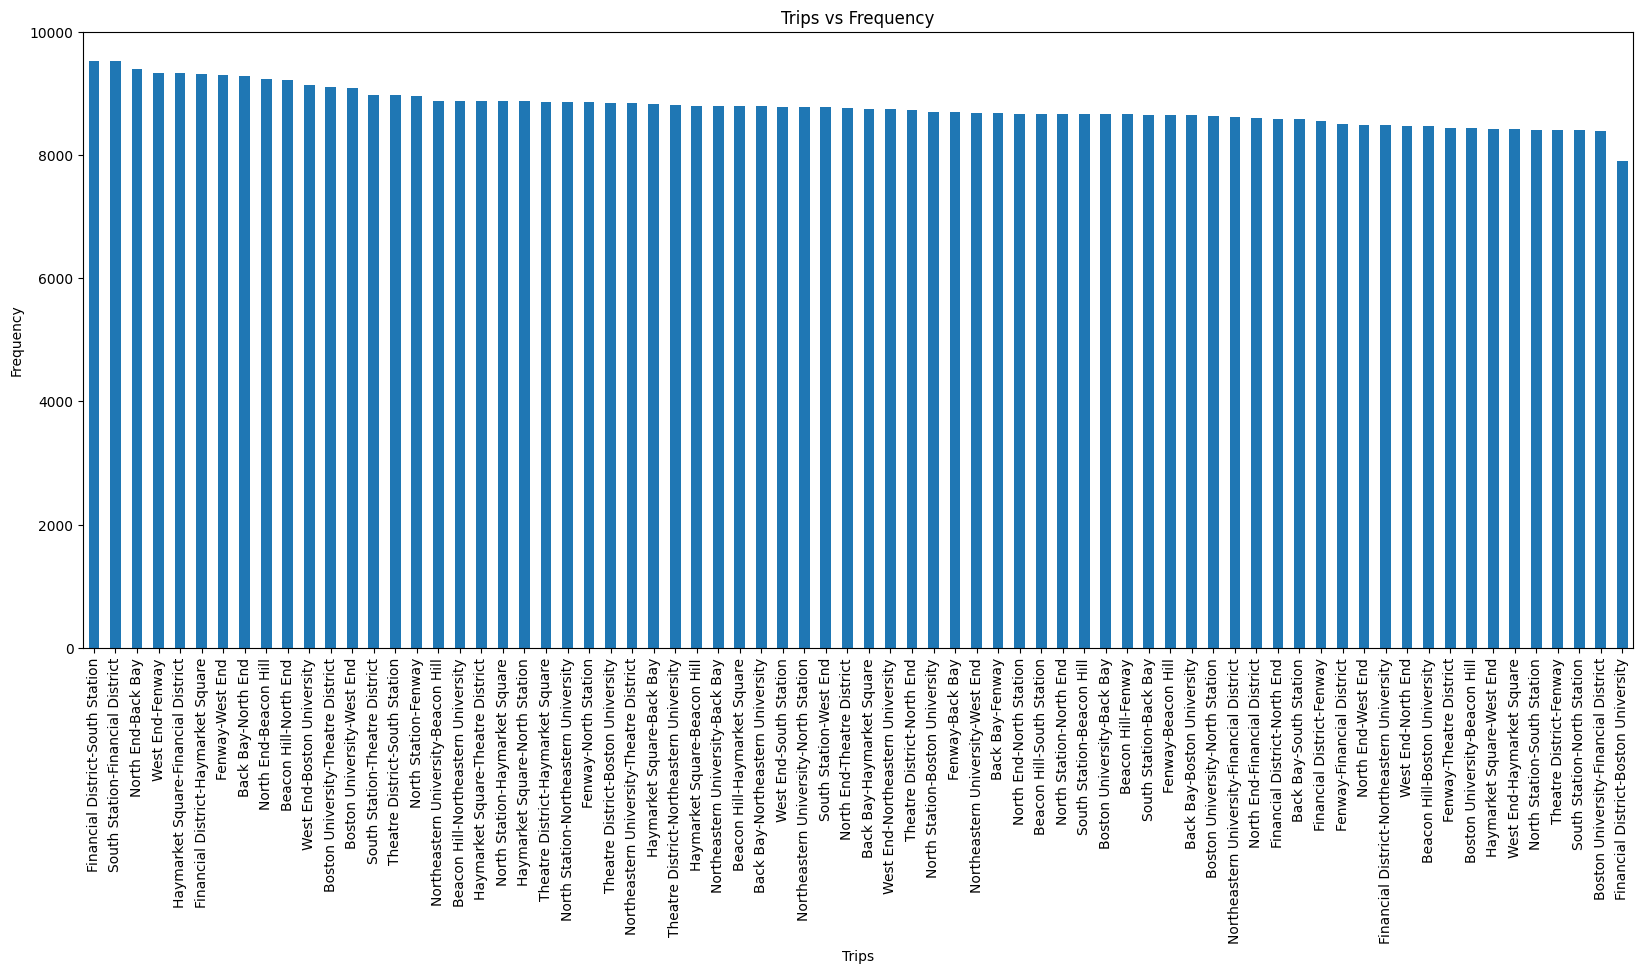

In [564]:
trips = df["Trips"].value_counts()
trips.plot(kind='bar',figsize=(20,8))
plt.xlabel("Trips")
plt.ylabel("Frequency")
plt.title("Trips vs Frequency")

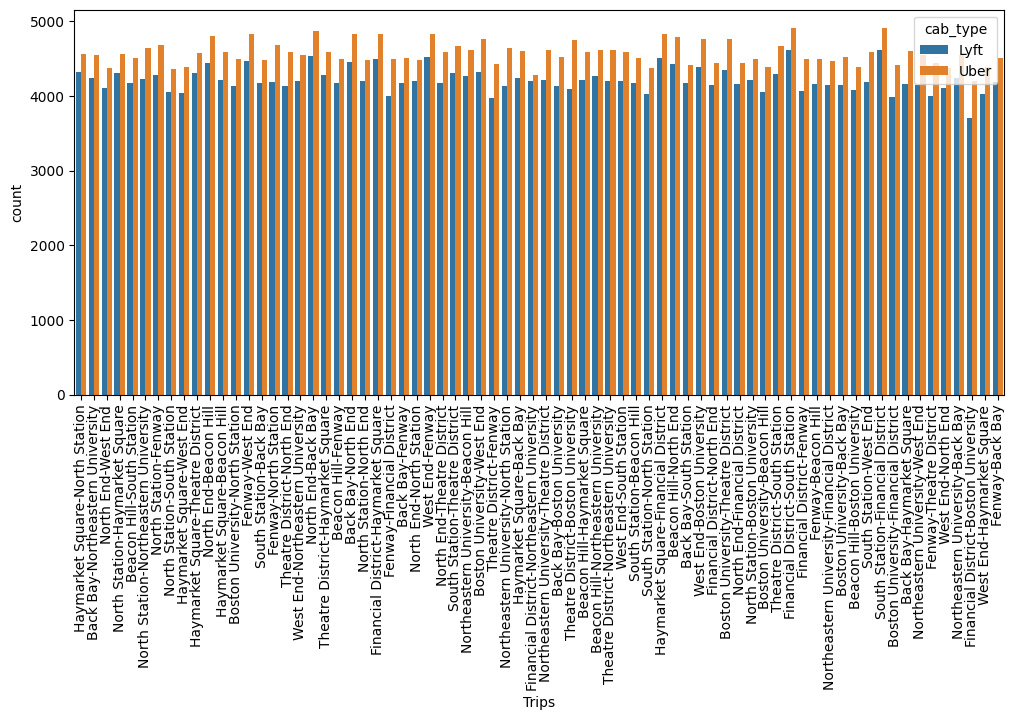

In [565]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="Trips", hue="cab_type")
plt.xticks(rotation=90)
plt.show()
#plt.xticks(range(len(df['Trips'])), df['Trips'])


<Axes: xlabel='name', ylabel='count'>

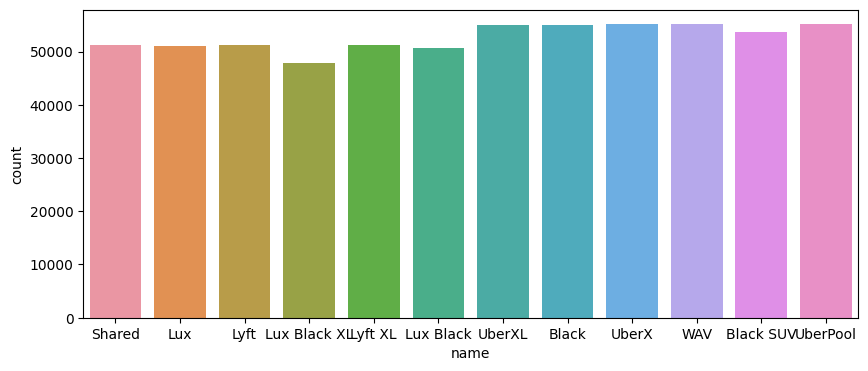

In [566]:
plt.figure(figsize=(10,4))
sns.countplot(x='name',data=df)

In [567]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [568]:
# df['datetime'] = label_encoder.fit_transform(df['datetime'])
df['source'] = label_encoder.fit_transform(df['source'])
df['destination'] = label_encoder.fit_transform(df['destination'])
df['Weekday'] = label_encoder.fit_transform(df['Weekday'])

#df['cab_type'] = label_encoder.fit_transform(df['cab_type'])
df['name'] = label_encoder.fit_transform(df['name'])
df['icon'] = label_encoder.fit_transform(df['icon'])

<ipython-input-568-831383adac57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source'] = label_encoder.fit_transform(df['source'])
<ipython-input-568-831383adac57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['destination'] = label_encoder.fit_transform(df['destination'])
<ipython-input-568-831383adac57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [569]:
df.drop(df.columns[-1], axis=1, inplace=True)
#df

<ipython-input-569-7f5feb620923>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.columns[-1], axis=1, inplace=True)


In [570]:
df['cab_type'] = label_encoder.fit_transform(df['cab_type'])

for i,item in enumerate(label_encoder.classes_):
  print(i,item)

0 Lyft
1 Uber


<ipython-input-570-ac23ef64241d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cab_type'] = label_encoder.fit_transform(df['cab_type'])


In [571]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])

correlation = numeric_features.corr()
print(correlation['price'].sort_values(ascending=False),'\n')

price               1.000000
distance            0.318671
surge_multiplier    0.141238
Weekday             0.002301
icon                0.002057
month               0.001648
latitude            0.001559
hour                0.000537
temperature         0.000143
longitude          -0.000933
day                -0.001263
source             -0.017200
destination        -0.041532
cab_type           -0.070408
name               -0.605524
Name: price, dtype: float64 



In [572]:
print(len(df[df["cab_type"]==1]))
print(len(df[df["cab_type"]==0]))

329071
303316


<Axes: ylabel='price'>

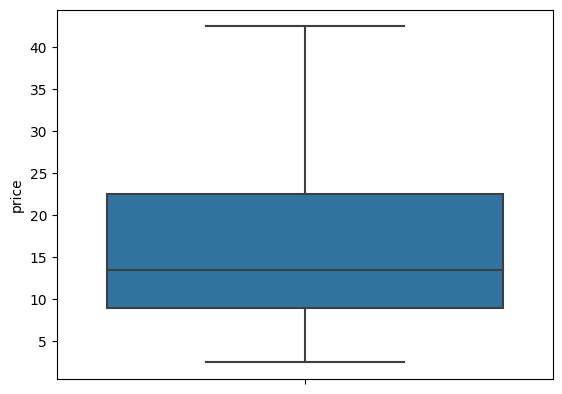

In [573]:
sns.boxplot(data=df ,y='price')

In [574]:
x = df[df['cab_type']==1].drop(['cab_type','price','datetime'],axis=1)
y = df[df['cab_type']==1]['price']

In [575]:
z = df[df['cab_type']==0].drop(['cab_type','price','datetime'],axis=1)
z_ = df[df['cab_type']==0]['price']

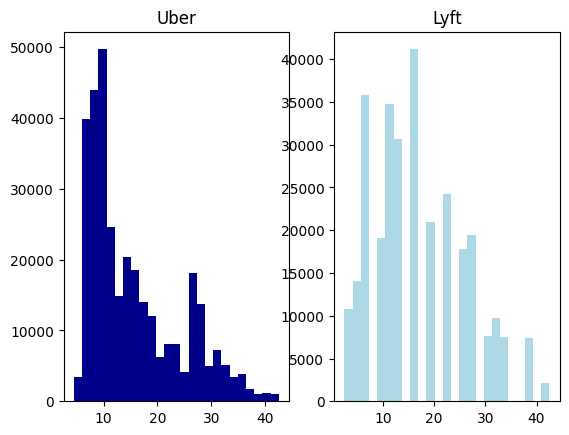

In [576]:
# plt.hist(y,bins=25,color='darkblue')
# plt.show()
from scipy.stats import gaussian_kde

plt.subplot(1, 2, 1)
plt.title('Uber')
plt.hist(y,bins=25,color='darkblue')

plt.subplot(1, 2, 2)
plt.title('Lyft')
plt.hist(z_,bins=25,color='lightblue')
plt.show()

#sns.histplot(y, kde=True)


In [577]:
#df[df[df['price']<=30 or df['price']>= 25] and df[df['distance']>=0 or df['distance']<=1]]
filtered_df = df[(df['price'] <= 30) & (df['price'] >= 25) & (df['distance'] >= 0) & (df['distance'] <= 1)]
filtered_df

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,icon,Weekday
3,4,30,11,2018-11-30 04:53:02,5,7,0,4,26.0,0.44,1.0,42.2148,-71.0330,34.38,1,0
22,16,16,12,2018-12-16 16:40:06,7,5,0,4,26.0,0.72,1.0,42.3661,-71.0631,42.42,2,3
209,20,28,11,2018-11-28 20:59:08,5,11,0,4,26.0,0.71,1.0,42.3644,-71.0661,41.91,2,6
332,20,3,12,2018-12-03 20:53:01,5,1,1,1,26.0,0.91,1.0,42.3398,-71.0892,52.90,4,1
359,0,30,11,2018-11-30 00:28:03,5,11,0,4,27.5,0.64,1.0,42.3398,-71.0892,38.60,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637795,17,28,11,2018-11-28 17:11:26,5,11,0,4,26.0,0.66,1.0,42.3644,-71.0661,40.77,2,6
637801,8,2,12,2018-12-02 08:12:56,5,7,1,1,27.0,0.49,1.0,42.3661,-71.0631,38.95,6,3
637848,6,29,11,2018-11-29 06:42:58,5,7,1,1,27.5,0.49,1.0,42.3647,-71.0542,38.74,5,4
637953,1,29,11,2018-11-29 01:47:08,5,1,1,1,26.0,0.91,1.0,42.3647,-71.0542,38.42,5,4


In [578]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 1513)

In [579]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score

In [580]:
# def train_test_models(X_train,X_test,y_train,y_test):
#   print("Linear Regression:")
#   model1 = LinearRegression()
#   model1 = model1.fit(X_train,y_train)
#   print(model1.score(X_test,y_test))

#   return model1

# Linear Regression with one input feature(distance)

In [581]:
input = df[df['cab_type']==1]['distance']

In [582]:
X_trn,X_tst,y_train,y_test = train_test_split(input,y,test_size = 0.25, random_state = 1513)

**We can say that calculation of fare not only depends on distance, it also deends on other factors.

In [583]:
model1 = LinearRegression()

X_trn_array = X_trn.to_numpy()
X_trn_1d= X_trn_array.reshape(-1, 1)

model1 = model1.fit(X_trn_1d,y_train)

X_tst_array = X_tst.to_numpy()
X_tst_1d= X_tst_array.reshape(-1, 1)

y_pred_lr1 = model1.predict(X_tst_1d)

mse = mean_squared_error(y_test, y_pred_lr1)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred_lr1)
print("R-squared:", r2)

Mean Squared Error: 62.62814150984159
R-squared: 0.09234139280693143


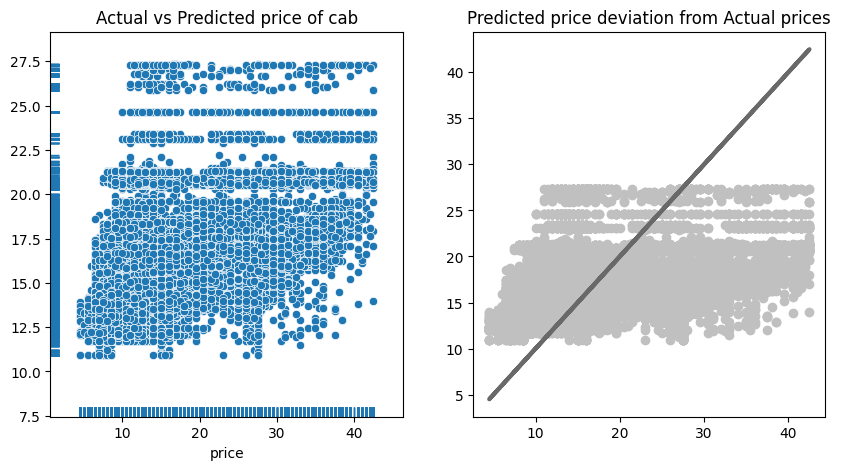

In [584]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Actual vs Predicted price of cab")
sns.scatterplot(x=y_test, y=y_pred_lr1)
sns.rugplot(x=y_test, y=y_pred_lr1)

plt.subplot(1, 2, 2)
plt.title("Predicted price deviation from Actual prices")
plt.scatter(y_test, y_pred_lr1,  color='silver')
plt.plot(y_test, y_test, color='dimgray', linewidth=3)

plt.show()

# Linear Regression

In [585]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

# Transform the continuous features in 'X_test' using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 24.33630307040332
R-squared: 0.64729825256527


In [586]:
# model1 = LinearRegression()
# model1 = model1.fit(X_train,y_train)
# y_pred = model1.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

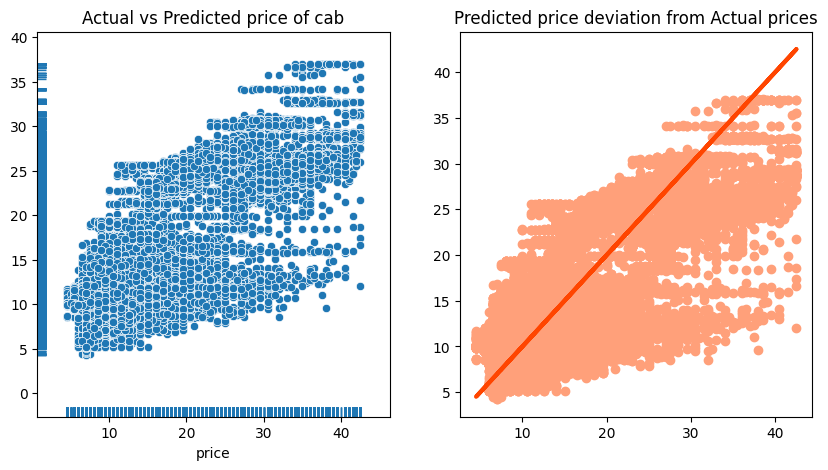

In [587]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Actual vs Predicted price of cab")
sns.scatterplot(x=y_test, y=y_pred)
sns.rugplot(x=y_test, y=y_pred)

plt.subplot(1, 2, 2)
plt.title("Predicted price deviation from Actual prices")
plt.scatter(y_test, y_pred,  color='lightsalmon')
plt.plot(y_test, y_test, color='orangered', linewidth=3)

plt.show()

# Lasso and Ridge Regularization

In [588]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1.0)
# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test)

# Create an instance of Lasso regression with L1 regularization
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength by changing the alpha parameter

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Calculate Mean Squared Error for Ridge regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)

r2_ridge = r2_score(y_test, y_pred_ridge)
print("R-squared:", r2_ridge)

# Calculate Mean Squared Error for Lasso regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)

r2_lasso = r2_score(y_test, y_pred_lasso)
print("R-squared:", r2_lasso)


Mean Squared Error (Ridge): 24.336303459073292
R-squared: 0.6472982469323447
Mean Squared Error (Lasso): 25.14989846062004
R-squared: 0.6355069580944488


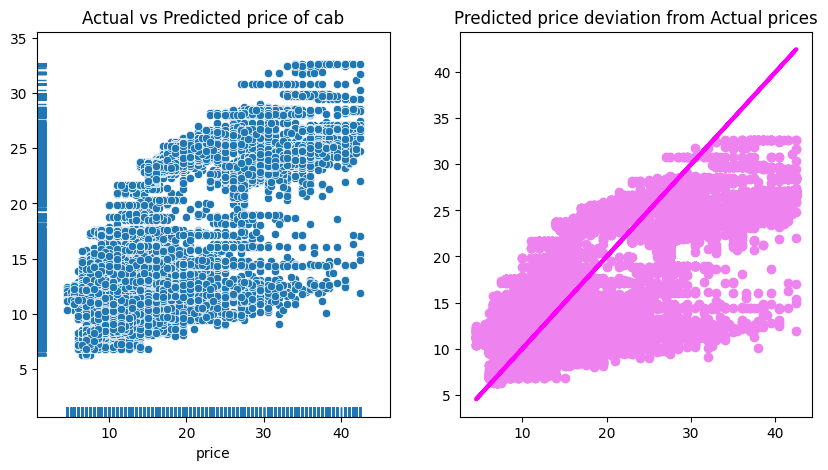

In [589]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Actual vs Predicted price of cab")
sns.scatterplot(x=y_test, y=y_pred_lasso)
sns.rugplot(x=y_test, y=y_pred_lasso)

plt.subplot(1, 2, 2)
plt.title("Predicted price deviation from Actual prices")
plt.scatter(y_test, y_pred_lasso,  color='violet')
plt.plot(y_test, y_test, color='magenta', linewidth=3)

plt.show()

# Random Forest

In [590]:
rf = RandomForestRegressor(n_estimators=100, random_state=312)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred_rf)
# print("Accuracy:", accuracy)




In [591]:
# report = classification_report(y_test, y_pred_rf)
# print("Classification Report:")
# print(report)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)
print("R-squared:", r2_rf)

Mean Squared Error (Random Forest): 3.8871249243081265
R-squared: 0.94366458416735


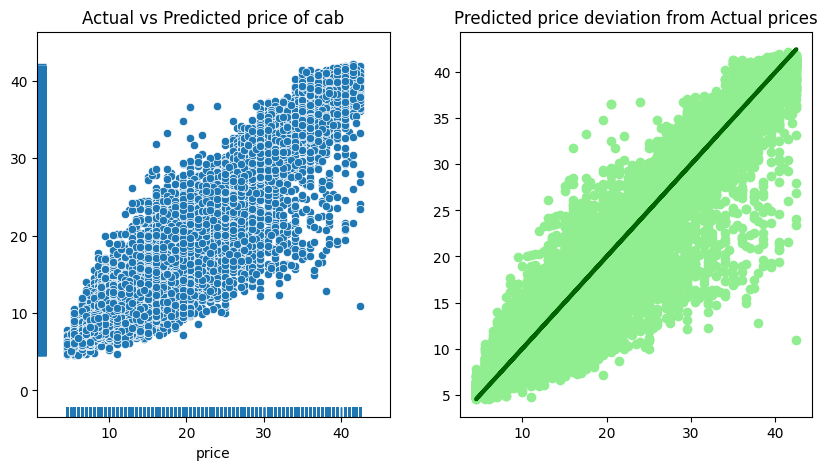

In [592]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Actual vs Predicted price of cab")
sns.scatterplot(x=y_test, y=y_pred_rf)
sns.rugplot(x=y_test, y=y_pred_rf)

plt.subplot(1, 2, 2)
plt.title("Predicted price deviation from Actual prices")
plt.scatter(y_test, y_pred_rf,  color='lightgreen')
plt.plot(y_test, y_test, color='darkgreen', linewidth=3)

plt.show()

In [593]:
dt = DecisionTreeRegressor(random_state=10)

# Train the classifier on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt.predict(X_test)

In [594]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error (Decision Tree):", mse_dt)

r2_dt = r2_score(y_test, y_pred_dt)
print("R-squared:", r2_dt)

Mean Squared Error (Decision Tree): 5.723518967558082
R-squared: 0.9170500492415136


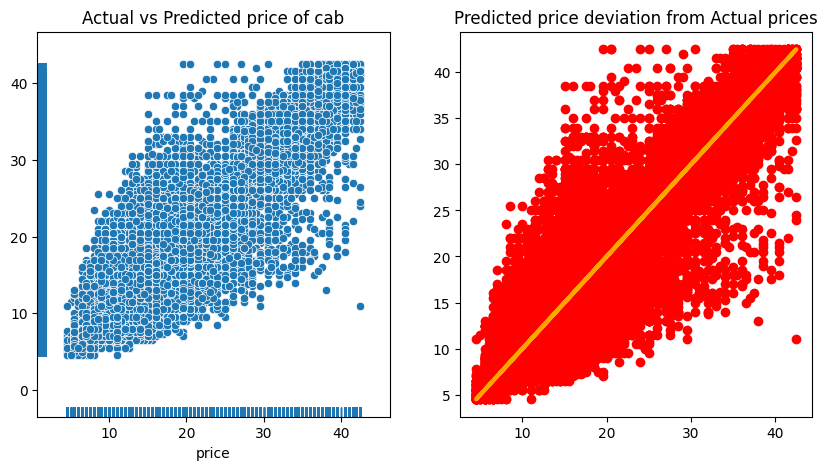

In [595]:
# sns.scatterplot(x=y_test, y=y_pred_dt)
# sns.rugplot(x=y_test, y=y_pred_dt)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Actual vs Predicted price of cab")
sns.scatterplot(x=y_test, y=y_pred_dt)
sns.rugplot(x=y_test, y=y_pred_dt)

plt.subplot(1, 2, 2)
plt.title("Predicted price deviation from Actual prices")
plt.scatter(y_test, y_pred_dt,  color='red')
plt.plot(y_test, y_test, color='orange', linewidth=3)

plt.show()

# Gradient Boosting

In [596]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the regressor on the training data
gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Mean Squared Error:", mse_gb)

r2_gb = r2_score(y_test, y_pred_gb)
print("R-squared:", r2_gb)

Mean Squared Error: 3.4158163584404915
R-squared: 0.9504951760728492


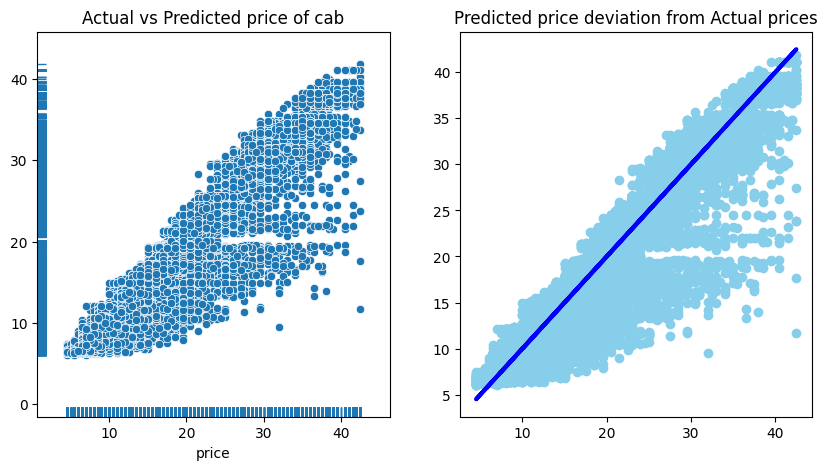

In [597]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Actual vs Predicted price of cab")
sns.scatterplot(x=y_test, y=y_pred_gb)
sns.rugplot(x=y_test, y=y_pred_gb)

plt.subplot(1, 2, 2)
plt.title("Predicted price deviation from Actual prices")
plt.scatter(y_test, y_pred_gb,  color='skyblue')
plt.plot(y_test, y_test, color='blue', linewidth=3)

plt.show()

In [598]:
# Initialize a decision tree as the base estimator
dt = DecisionTreeRegressor(max_depth=3)

# Initialize the AdaBoostRegressor with the base estimator and the number of estimators (weak learners)
adaboost_reg = AdaBoostRegressor(estimator=dt, n_estimators=5, random_state=13)

adaboost_reg.fit(X_train, y_train)

y_pred_ad = adaboost_reg.predict(X_test)

# Evaluate the model
mse_ad = mean_squared_error(y_test, y_pred_ad)
print("Mean Squared Error:", mse_ad)

r2_ad = r2_score(y_test, y_pred_ad)
print("R-squared:", r2_ad)

Mean Squared Error: 8.550519959152567
R-squared: 0.8760788225580449


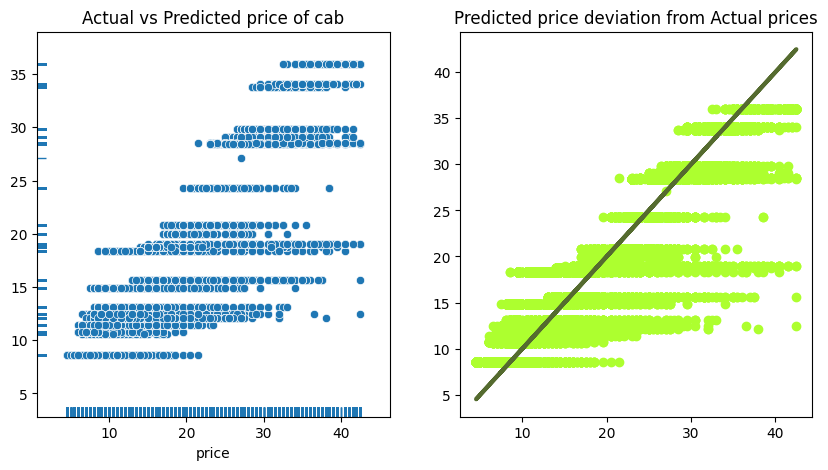

In [599]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Actual vs Predicted price of cab")
sns.scatterplot(x=y_test, y=y_pred_ad)
sns.rugplot(x=y_test, y=y_pred_ad)

plt.subplot(1, 2, 2)
plt.title("Predicted price deviation from Actual prices")
plt.scatter(y_test, y_pred_ad,  color='greenyellow')
plt.plot(y_test, y_test, color='darkolivegreen', linewidth=3)

plt.show()

In [600]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])

correlation = numeric_features.corr()
print(correlation['price'].sort_values(ascending=False),'\n')

price               1.000000
distance            0.318671
surge_multiplier    0.141238
Weekday             0.002301
icon                0.002057
month               0.001648
latitude            0.001559
hour                0.000537
temperature         0.000143
longitude          -0.000933
day                -0.001263
source             -0.017200
destination        -0.041532
cab_type           -0.070408
name               -0.605524
Name: price, dtype: float64 



<ipython-input-601-e0846bb4e1a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

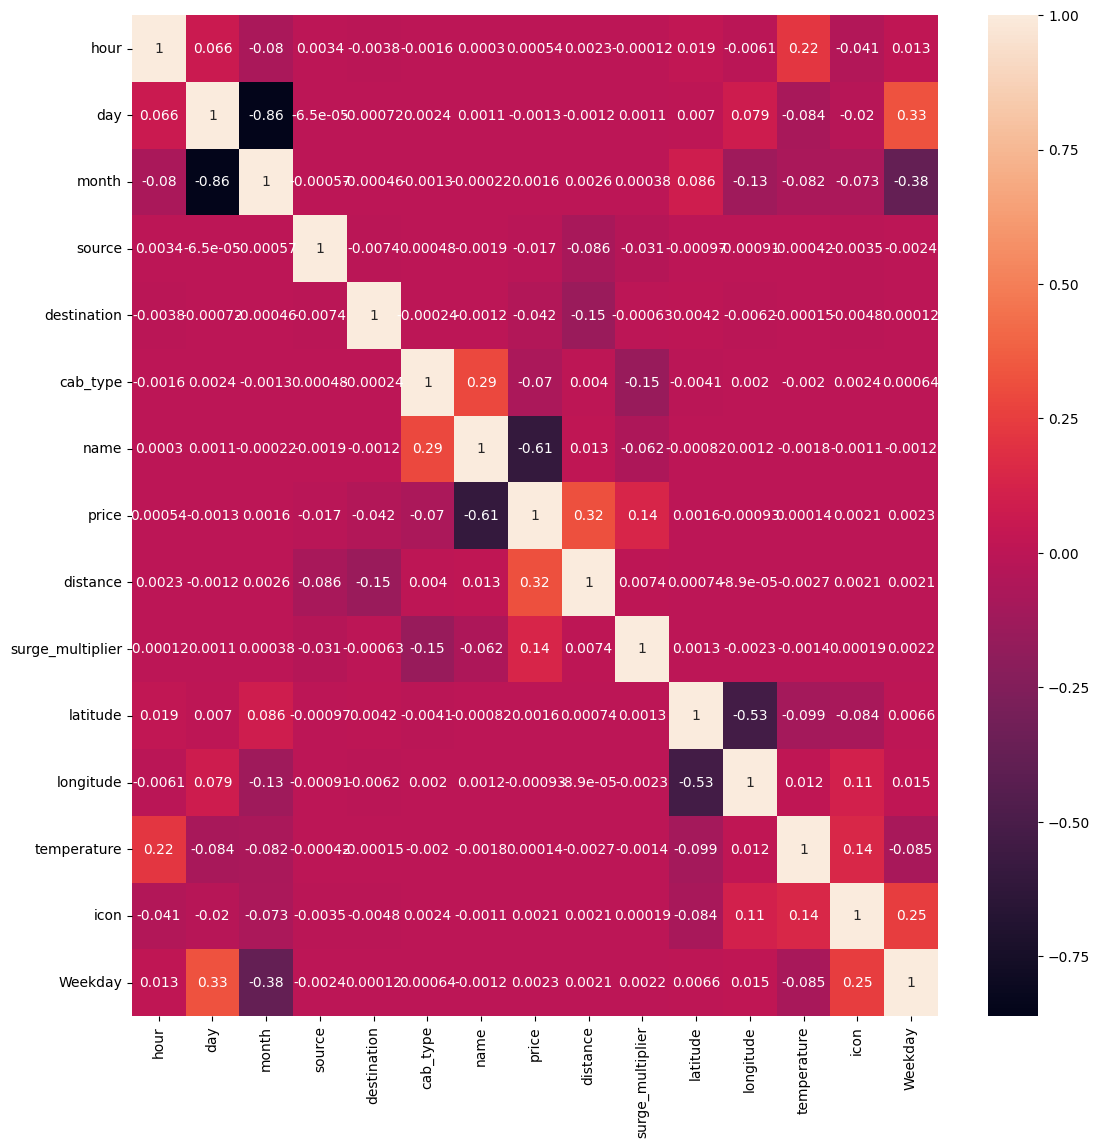

In [601]:
plt.figure(figsize= (13,13))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)

In [602]:
req_cols = ['source','destination','cab_type','name','distance','surge_multiplier','price','Weekday']

test_df = df[req_cols]

In [603]:
xx = test_df[test_df['cab_type']==1].drop(['cab_type','price'],axis=1)
yy = test_df[test_df['cab_type']==1]['price']

In [604]:
XX_train,XX_test,yy_train,yy_test = train_test_split(xx,yy,test_size = 0.25, random_state = 13)

In [624]:
rf = RandomForestRegressor(n_estimators=100, random_state=312)

# Train the classifier on the training data
rf.fit(XX_train, yy_train)

# Make predictions on the test data
yy_pred_rf = rf.predict(XX_test)

mse_rf1 = mean_squared_error(yy_test, yy_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf1)

r2_rf1 = r2_score(yy_test, yy_pred_rf)
print("R-squared:", r2_rf1)


Mean Squared Error (Random Forest): 3.30430847901684
R-squared: 0.9522541026027673


In [625]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the regressor on the training data
gb.fit(XX_train, yy_train)

# Make predictions on the test data
yy_pred_gb = gb.predict(XX_test)

# Evaluate the model
mse_gb1 = mean_squared_error(yy_test, yy_pred_gb)
print("Mean Squared Error:", mse_gb1)

r2_gb1 = r2_score(yy_test, yy_pred_gb)
print("R-squared:", r2_gb1)

Mean Squared Error: 3.4635374070238596
R-squared: 0.9499533101351232


In [607]:
# def revenue_in_a_week(hr,price):
#   temp0 =0
#   temp1 = 0
#   temp2 = 0
#   if 26 <= int(hr[8:10]) <= 2:
#     temp0 += price
#   elif 3 <= int(hr[8:10]) <= 9:
#     temp1 += price
#   else:
#     temp2 += price
#   return list[temp,temp1,temp2]

In [608]:
rev_Uber = [0,0,0,0,0,0,0]
rev_Lyft = [0,0,0,0,0,0,0]
pass_Uber = [0,0,0,0,0,0,0]
pass_Lyft = [0,0,0,0,0,0,0]
day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for i in range(len(df)):
  if df.iloc[i,7] == 0:
    rev_Lyft[int(df.iloc[i,-1])] += df.iloc[i,9]
    pass_Lyft[int(df.iloc[i,-1])] += 1
  else:
    rev_Uber[int(df.iloc[i,-1])] += df.iloc[i,9]
    pass_Uber[int(df.iloc[i,-1])] += 1

In [609]:
for i in range(len(rev_Uber)):
  if rev_Uber[i] > rev_Lyft[i]:
    print(day[i],": Uber - ",rev_Uber[i],"$ ,Lyft - ",rev_Lyft[i],"$  Uber has", (rev_Uber[i]*100)/rev_Lyft[i],"% more revenue than Lyft")

Monday : Uber -  163098.02000000907 $ ,Lyft -  15351.12999999962 $  Uber has 1062.449604687167 % more revenue than Lyft
Tuesday : Uber -  223818.24000001026 $ ,Lyft -  21374.36999999964 $  Uber has 1047.1337400822297 % more revenue than Lyft
Wednesday : Uber -  162487.22000000885 $ ,Lyft -  15561.989999999607 $  Uber has 1044.1288035785458 % more revenue than Lyft
Thursday : Uber -  166422.34000001106 $ ,Lyft -  16076.199999999617 $  Uber has 1035.2094400418944 % more revenue than Lyft
Friday : Uber -  178456.24000001317 $ ,Lyft -  17264.929999999604 $  Uber has 1033.6343095513116 % more revenue than Lyft
Saturday : Uber -  225844.7500000116 $ ,Lyft -  22014.279999999562 $  Uber has 1025.9011423494937 % more revenue than Lyft
Sunday : Uber -  133324.14000001008 $ ,Lyft -  12582.409999999833 $  Uber has 1059.6073407241686 % more revenue than Lyft


In [610]:
for i in range(len(rev_Uber)):
  if pass_Uber[i] > pass_Lyft[i]:
    print(day[i],": Uber - ",pass_Uber[i]," ,Lyft - ",pass_Lyft[i],"$  Uber has", (pass_Uber[i]*100)/pass_Lyft[i],"% more customers than Lyft")

Monday : Uber -  75116  ,Lyft -  7083 $  Uber has 1060.5110828744882 % more customers than Lyft
Tuesday : Uber -  103511  ,Lyft -  9754 $  Uber has 1061.2159114209555 % more customers than Lyft
Wednesday : Uber -  75093  ,Lyft -  7175 $  Uber has 1046.5923344947735 % more customers than Lyft
Thursday : Uber -  76141  ,Lyft -  7318 $  Uber has 1040.4618748291882 % more customers than Lyft
Friday : Uber -  82033  ,Lyft -  7881 $  Uber has 1040.8958254028676 % more customers than Lyft
Saturday : Uber -  104006  ,Lyft -  10032 $  Uber has 1036.7424242424242 % more customers than Lyft
Sunday : Uber -  61469  ,Lyft -  5775 $  Uber has 1064.3982683982683 % more customers than Lyft


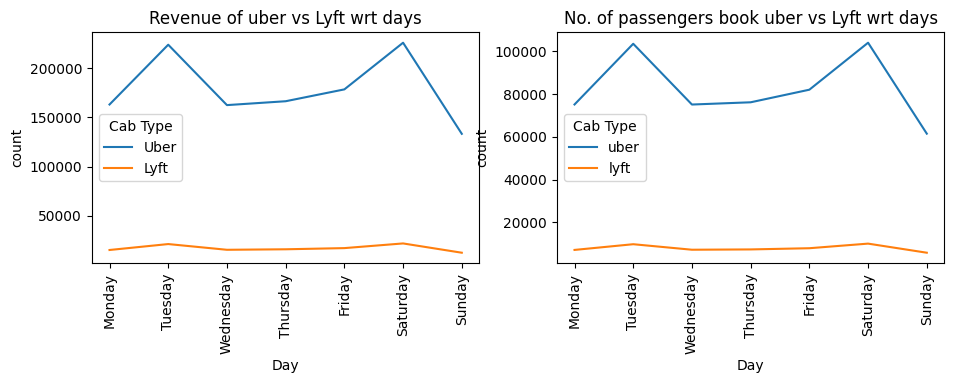

In [611]:
dfx = pd.DataFrame({'Day': day, 'Uber': rev_Uber, 'Lyft': rev_Lyft, 'uber': pass_Uber, 'lyft': pass_Lyft})

plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
# Melt the DataFrame to transform the 'count1' and 'count2' columns into a single 'count' column
df_melted = dfx.melt(id_vars='Day', value_vars=['Uber', 'Lyft'], var_name='Cab Type', value_name='count')

sns.lineplot(data=df_melted, x='Day', y='count', hue='Cab Type')
plt.title("Revenue of uber vs Lyft wrt days")
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
df_melted = dfx.melt(id_vars='Day', value_vars=['uber', 'lyft'], var_name='Cab Type', value_name='count')

sns.lineplot(data=df_melted, x='Day', y='count', hue='Cab Type')
plt.title("No. of passengers book uber vs Lyft wrt days")
plt.xticks(rotation='vertical')


# Show the plot
plt.show()

# Observation
We can see that revenue and total bookings of Uber is almost 10 times that of Lyft. So we try to find the reason and also strategy to increase sales of Lyft.

In [612]:
columns_to_drop = ['day', 'month', 'datetime', 'latitude', 'longitude']

df_test = df.drop(columns=columns_to_drop, axis=1)

In [620]:
df_test


,hour,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,icon,Weekday
0,9,5,7,0,7,5.0,0.44,1.0,42.34,5,3
1,2,5,7,0,2,11.0,0.44,1.0,43.58,6,5
2,1,5,7,0,5,7.0,0.44,1.0,38.33,1,6
3,4,5,7,0,4,26.0,0.44,1.0,34.38,1,0
4,3,5,7,0,6,9.0,0.44,1.0,37.44,5,4
...,...,...,...,...,...,...,...,...,...,...,...
637971,23,11,6,1,11,9.5,1.00,1.0,37.05,5,2
637972,23,11,6,1,10,13.0,1.00,1.0,37.05,5,2
637973,23,11,6,1,9,9.5,1.00,1.0,37.05,5,2
637974,23,11,6,1,1,27.0,1.00,1.0,37.05,5,2


In [621]:
xxx = df_test[df_test['cab_type']==1].drop(['cab_type','price'],axis=1)
yyy = df_test[df_test['cab_type']==1]['price']

In [622]:
from sklearn.model_selection import train_test_split
XXX_train,XXX_test,yyy_train,yyy_test = train_test_split(xxx,yyy,test_size = 0.25, random_state = 6)

In [626]:
rf = RandomForestRegressor(n_estimators=100, random_state=2)

# Train the classifier on the training data
rf.fit(XXX_train, yyy_train)

# Make predictions on the test data
yyy_pred_rf = rf.predict(XXX_test)

mse_rf2 = mean_squared_error(yyy_test, yyy_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf2)

r2_rf2 = r2_score(yyy_test, yyy_pred_rf)
print("R-squared:", r2_rf2)

Mean Squared Error (Random Forest): 3.9195274341739283
R-squared: 0.9434940520715875


In [627]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the regressor on the training data
gb.fit(XXX_train, yyy_train)

# Make predictions on the test data
yyy_pred_gb = gb.predict(XXX_test)

# Evaluate the model
mse_gb2 = mean_squared_error(yyy_test, yyy_pred_gb)
print("Mean Squared Error:", mse_gb2)

r2_gb2 = r2_score(yyy_test, yyy_pred_gb)
print("R-squared:", r2_gb2)

Mean Squared Error: 3.469996556611863
R-squared: 0.949974723220427


In [618]:
df2 = pd.read_csv("Uber_and_Lyft.csv")

In [647]:
df2.dropna(inplace=True)

In [649]:
df2['id'] = label_encoder.fit_transform(df2['id'])
df2['datetime'] = label_encoder.fit_transform(df2['datetime'])
df2['timezone'] = label_encoder.fit_transform(df2['timezone'])
df2['source'] = label_encoder.fit_transform(df2['source'])
df2['destination'] = label_encoder.fit_transform(df2['destination'])
df2['product_id'] = label_encoder.fit_transform(df2['product_id'])
df2['name'] = label_encoder.fit_transform(df2['name'])
df2['short_summary'] = label_encoder.fit_transform(df2['short_summary'])
df2['long_summary'] = label_encoder.fit_transform(df2['long_summary'])
df2['icon'] = label_encoder.fit_transform(df2['icon'])


In [650]:
df2['cab_type'] = label_encoder.fit_transform(df2['cab_type'])

for i,item in enumerate(label_encoder.classes_):
  print(i,item)

0 0
1 1


In [651]:
x1 = df2[df2['cab_type']==1].drop(['cab_type','price','datetime','id','long_summary'],axis=1)
y1 = df2[df2['cab_type']==1]['price']

In [652]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.25, random_state = 1)

In [655]:
x1.shape

(330568, 52)

# RFE (Recursive Feature Elimination)

In [654]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [658]:
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X1_train, y1_train)
y1_pred = reg.predict(X1_test)
r2_score(y1_test,y1_pred)

0.6536110354393975

In [663]:
rfe = RFE(estimator=reg, n_features_to_select=38, verbose=1)
rfe = rfe.fit(x1, y1)

Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.


In [665]:
feature_ranking = rfe.ranking_
feature_ranking

array([13,  1,  1,  1, 14,  1,  1,  1,  1,  1, 15,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 12,  1,  1,  7,  1,  6,  1,  3,  1,  5,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  1,  1,  1, 10,  1,  9,  1,  8,  1, 11,  1,
        4])

In [666]:
rfe.support_


array([False,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True, False])

In [667]:
XX = x1[x1.columns[rfe.support_]]

In [668]:
X1_train,X1_test,y1_train,y1_test = train_test_split(XX,y1,test_size = 0.25, random_state = 1)

In [679]:
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X1_train, y1_train)
y1_pred = reg1.predict(X1_test)
r2_score(y1_test,y1_pred)

0.6536555178206718

In [680]:
rfe = RFE(estimator=reg, n_features_to_select=19, verbose=1)
rfe = rfe.fit(x1, y1)

Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 fe

In [681]:
XX = x1[x1.columns[rfe.support_]]


In [682]:
X1_train,X1_test,y1_train,y1_test = train_test_split(XX,y1,test_size = 0.25, random_state = 1)

In [683]:
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X1_train, y1_train)
y1_pred = reg1.predict(X1_test)
r2_score(y1_test,y1_pred)

0.6536555178206718

In [684]:
rfe = RFE(estimator=reg, n_features_to_select=25, verbose=1)
rfe = rfe.fit(x1, y1)

Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.


In [685]:
XX = x1[x1.columns[rfe.support_]]

In [686]:
X1_train,X1_test,y1_train,y1_test = train_test_split(XX,y1,test_size = 0.25, random_state = 1)

In [687]:
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X1_train, y1_train)
y1_pred = reg1.predict(X1_test)
r2_score(y1_test,y1_pred)

0.6536737530293393

R squared value is higher when no.of features selected are 25. As by above test cases we observe random forest and Gradient Boosting gives more accuracy. So we use them with these features.

In [693]:
useless = ['day','month','latitude','longitude','temperature','precipProbability','humidity','windSpeed','windGust'
            ,'temperatureHigh','temperatureLow','apparentTemperatureHigh','apparentTemperatureLow',
           'dewPoint','moonPhase','precipIntensityMax','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'
           ]

In [694]:
random = RandomForestRegressor(n_estimators = 100, random_state = 0)
random = random.fit(X1_train, y1_train)
y1_pred = random.predict(X1_test)
r2_score(y1_test,y1_pred)

0.93932492870481

In [695]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5)
clf = clf.fit(X1_train, y1_train)
y1_pred = clf.predict(X1_test)
r2_score(y1_test,y1_pred)

0.9531874581825158

In [696]:
XX.drop(columns=useless, axis=1, inplace=True)

<ipython-input-696-aa5e37328ea9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XX.drop(columns=useless, axis=1, inplace=True)


In [697]:
X1_train,X1_test,y1_train,y1_test = train_test_split(XX,y1,test_size = 0.2, random_state = 1)

In [698]:
random = RandomForestRegressor(n_estimators = 100, random_state = 0)
random = random.fit(X1_train, y1_train)
y1_pred = random.predict(X1_test)
r2_score(y1_test,y1_pred)

0.9491191283571165

In [699]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5)
clf = clf.fit(X1_train, y1_train)
y1_pred = clf.predict(X1_test)
r2_score(y1_test,y1_pred)

0.9529157257414943

In [706]:
XX

,source,product_id,name,distance,icon,uvIndex
12,6,3,10,1.11,2,0
13,6,1,0,1.11,1,0
14,6,0,9,1.11,4,0
15,6,5,11,1.11,6,0
16,6,2,1,1.11,2,0
...,...,...,...,...,...,...
693065,11,5,11,1.00,5,0
693066,11,3,10,1.00,5,0
693067,11,0,9,1.00,5,0
693069,11,2,1,1.00,5,0


In [705]:
# dist = XX['distance'].unique()
# print(sorted(dist))

[0.02, 0.03, 0.04, 0.12, 0.17, 0.27, 0.29, 0.3, 0.35, 0.38, 0.39, 0.4, 0.47, 0.49, 0.5, 0.52, 0.53, 0.54, 0.55, 0.56, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.65, 0.66, 0.67, 0.68, 0.7, 0.71, 0.72, 0.73, 0.76, 0.78, 0.79, 0.8, 0.81, 0.82, 0.85, 0.86, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.0, 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09, 2.1, 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18

# Accuracte Algorithm:
Gradient Boosting with 25 features gives an R2 score of 0.9531 and Random Forest with 16 Features acheives 0.9522
We use this results in calculating for Lytf Predictions.

Features: Source, product_id, name, distance, icon, uvindex, surge_multiplier, hour, Weekday,

In [707]:
df_ = pd.read_csv("Uber_and_Lyft.csv")

In [724]:
useful = ['source', 'product_id', 'name', 'distance', 'icon', 'uvIndex', 'surge_multiplier', 'hour', 'Weekday','price','cab_type']

df_['Weekday'] = df_['datetime'].apply(convert_date_to_day)

In [725]:
df3 = df_[useful]

In [726]:
df3.dropna(inplace=True)

<ipython-input-726-1cb041b5c165>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)


In [727]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source            637976 non-null  object 
 1   product_id        637976 non-null  object 
 2   name              637976 non-null  object 
 3   distance          637976 non-null  float64
 4   icon              637976 non-null  object 
 5   uvIndex           637976 non-null  int64  
 6   surge_multiplier  637976 non-null  float64
 7   hour              637976 non-null  int64  
 8   Weekday           637976 non-null  object 
 9   price             637976 non-null  float64
 10  cab_type          637976 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 58.4+ MB


In [728]:
df3['source'] = label_encoder.fit_transform(df3['source'])
df3['product_id'] = label_encoder.fit_transform(df3['product_id'])
df3['name'] = label_encoder.fit_transform(df3['name'])
df3['icon'] = label_encoder.fit_transform(df3['icon'])
df3['Weekday'] = label_encoder.fit_transform(df3['Weekday'])



<ipython-input-728-f525b192a34e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['source'] = label_encoder.fit_transform(df3['source'])
<ipython-input-728-f525b192a34e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['product_id'] = label_encoder.fit_transform(df3['product_id'])
<ipython-input-728-f525b192a34e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [729]:
df3['cab_type'] = label_encoder.fit_transform(df3['cab_type'])

for i,item in enumerate(label_encoder.classes_):
  print(i,item)

0 Lyft
1 Uber


<ipython-input-729-373ffdab12af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cab_type'] = label_encoder.fit_transform(df3['cab_type'])


In [731]:
x = df3[df3['cab_type']==0].drop(['cab_type','price'],axis=1)
y = df3[df3['cab_type']==1]['price']

In [732]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 15)

In [733]:
rf = RandomForestRegressor(n_estimators=100, random_state=312)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf_lyft = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf_lyft)
print("Mean Squared Error (Random Forest):", mse_rf)

r2_rf = r2_score(y_test, y_pred_rf_lyft)
print("R-squared:", r2_rf)

Mean Squared Error (Random Forest): 2.1917449842979706
R-squared: 0.978233996073305


In [734]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the regressor on the training data
gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb_lyft = gb.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb_lyft)
print("Mean Squared Error:", mse_gb)

r2_gb = r2_score(y_test, y_pred_gb_lyft)
print("R-squared:", r2_gb)

Mean Squared Error: 2.4112028290857204
R-squared: 0.9760545817958158


# a/b Testing

Predicting the price of Lyft for customers who used Uber for booking.

5589


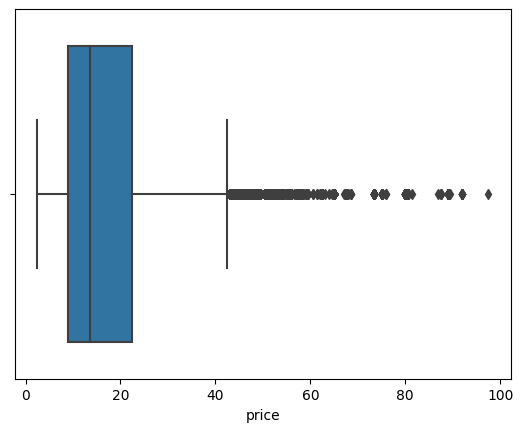

In [767]:
from matplotlib.cbook import boxplot_stats

outliers = boxplot_stats(df3.price)[0]['fliers']
sns.boxplot(data =df3,x='price')
print(len(outliers))
#print(outliers)

In [768]:
# Calculate the IQR and the outlier thresholds
Q1 = df3['price'].quantile(0.25)
Q3 = df3['price'].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Remove outliers by filtering the DataFrame
df3= df3[(df3['price'] >= lower_threshold) & (df3['price'] <= upper_threshold)]

In [769]:
x = df3[df3['cab_type']==1].drop(['cab_type','price'],axis=1)
y = df3[df3['cab_type']==1]['price']

a = df3[df3['cab_type']==0].drop(['cab_type','price'],axis=1)
b = df3[df3['cab_type']==0]['price']

In [770]:
rf = RandomForestRegressor(n_estimators=100, random_state=312)

# Train the classifier on the training data
rf.fit(x,y)
y_uber = rf.predict(a)

mse_rf = mean_squared_error(b,y_uber)
print("Mean Squared Error (Random Forest):", mse_rf)

r2_rf = r2_score(b,y_uber)
print("R-squared:", r2_rf)

Mean Squared Error (Random Forest): 52.95494548682689
R-squared: 0.3746052589456773


In [771]:
b = b.to_numpy()
b

array([ 5. , 11. ,  7. , ...,  7. , 10.5, 32.5])

In [772]:
y_uber

array([ 6.98361905, 26.70376046,  7.50584325, ..., 10.06266667,
       10.06266667, 33.858     ])

In [773]:
rf = RandomForestRegressor(n_estimators=100, random_state=312)

# Train the classifier on the training data
rf.fit(a,b)
y_lyft = rf.predict(x)

mse_rf = mean_squared_error(y,y_lyft)
print("Mean Squared Error (Random Forest):", mse_rf)

r2_rf = r2_score(y,y_lyft)
print("R-squared:", r2_rf)

Mean Squared Error (Random Forest): 34.99066851915295
R-squared: 0.4929648304472467


In [774]:
y = y.to_numpy()
y

array([12. , 16. ,  7.5, ...,  9.5, 27. , 10. ])

In [775]:
y_lyft

array([ 5.905 , 14.4475,  6.17  , ...,  6.29  , 14.33  ,  6.29  ])

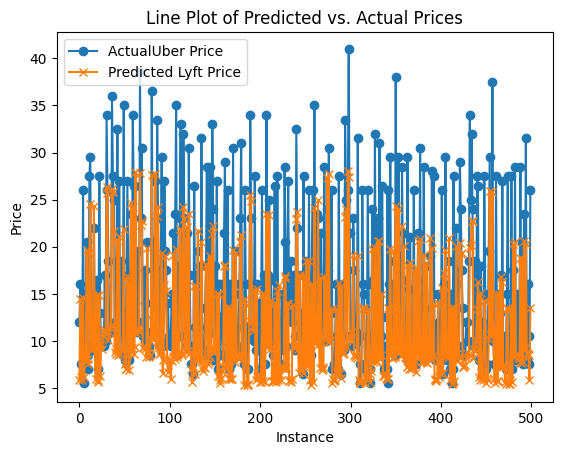

In [778]:
y_uber_subset = y[:500]
y_lyft_subset = y_lyft[:500]

plt.plot(y_uber_subset, label='ActualUber Price', marker='o')
plt.plot(y_lyft_subset, label='Predicted Lyft Price', marker='x')

# Set plot labels and title
plt.xlabel('Instance')
plt.ylabel('Price')
plt.title('Line Plot of Predicted vs. Actual Prices')

# Show a legend to differentiate between 'Actual Price' and 'Predicted Price' lines
plt.legend()

# Show the plot
plt.show()